### YouTube Data Analysis: Exploratory Data Analysis (EDA)
Explore the fascinating world of YouTube's top creators through comprehensive data analysis. This EDA will uncover trends, patterns, and insights into subscriber counts, video views, upload frequencies, countries of origin, and earnings, providing a deeper understanding of what drives success on the platform.

In [46]:
# IMPORTING PYTHON LIBRARY
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
# READING FILE
df=pd.read_csv("youtube.csv", encoding='unicode_escape')
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,Country,Abbreviation,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082,India,india,IN,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000.0,0.000000e+00,Film & Animation,youtubemovies,1,United States,United States,US,...,NaN,2006.0,NaN,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741,United States,United States,US,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,United States,US,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000.0,1.480000e+11,Shows,SET India,116536,India,India,IN,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     1006 non-null   int64  
 1   Youtuber                                 1006 non-null   object 
 2   subscribers                              1003 non-null   float64
 3   video views                              1006 non-null   float64
 4   category                                 951 non-null    object 
 5   Title                                    1006 non-null   object 
 6   uploads                                  1006 non-null   int64  
 7   Country of origin                        881 non-null    object 
 8   Country                                  881 non-null    object 
 9   Abbreviation                             881 non-null    object 
 10  channel_type                             974 non

In [49]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country of origin', 'Country', 'Abbreviation',
       'channel_type', 'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [50]:
# PRE PROCESSING
# REMOVE DUPLICATES BASED ON YOUTUBER NAME
df=df.drop_duplicates(subset='Youtuber')


In [51]:
# DROPPING CHANNEL CREATED BEFORE 2005
df=df[df['created_year']>=2005]

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989 entries, 0 to 994
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     989 non-null    int64  
 1   Youtuber                                 989 non-null    object 
 2   subscribers                              986 non-null    float64
 3   video views                              989 non-null    float64
 4   category                                 937 non-null    object 
 5   Title                                    989 non-null    object 
 6   uploads                                  989 non-null    int64  
 7   Country of origin                        869 non-null    object 
 8   Country                                  869 non-null    object 
 9   Abbreviation                             869 non-null    object 
 10  channel_type                             962 non-null  

In [53]:
# SHORTING THE COLUMNS NAMES
df.rename(columns = {'video_views_for_the_last_30_days':'last_month_views'},inplace = True)
df.rename(columns = {'subscribers_for_last_30_days':'last_month_subs'},inplace = True)
df.rename(columns = {'Gross tertiary education enrollment (%)':'gte enroll_%'},inplace = True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989 entries, 0 to 994
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rank                      989 non-null    int64  
 1   Youtuber                  989 non-null    object 
 2   subscribers               986 non-null    float64
 3   video views               989 non-null    float64
 4   category                  937 non-null    object 
 5   Title                     989 non-null    object 
 6   uploads                   989 non-null    int64  
 7   Country of origin         869 non-null    object 
 8   Country                   869 non-null    object 
 9   Abbreviation              869 non-null    object 
 10  channel_type              962 non-null    object 
 11  video_views_rank          989 non-null    float64
 12  country_rank              875 non-null    float64
 13  channel_type_rank         960 non-null    float64
 14  last_month_view

In [55]:
#MISSING VALUE IN EACH COLUMN
df.isnull().sum()

rank                          0
Youtuber                      0
subscribers                   3
video views                   0
category                     52
Title                         0
uploads                       0
Country of origin           120
Country                     120
Abbreviation                120
channel_type                 27
video_views_rank              0
country_rank                114
channel_type_rank            29
last_month_views             51
lowest_monthly_earnings       0
highest_monthly_earnings      0
lowest_yearly_earnings        0
highest_yearly_earnings       0
last_month_subs             332
created_year                  0
created_month                 7
created_date                  0
gte enroll_%                121
Population                  121
Unemployment rate           121
Urban_population            121
Latitude                    121
Longitude                   121
dtype: int64

In [56]:
# Comparing Country of origin and Country
df['Country of origin'].value_counts()

Country of origin
United States           311
India                   168
Brazil                   61
United Kingdom           43
Mexico                   33
Indonesia                28
Spain                    22
Thailand                 18
South Korea              17
Russia                   16
Canada                   15
Argentina                13
Philippines              12
Colombia                 11
Saudi Arabia              9
Australia                 8
Ukraine                   8
United Arab Emirates      7
Germany                   6
Pakistan                  6
France                    5
Japan                     5
Turkey                    4
Sweden                    4
Vietnam                   3
Jordan                    3
Netherlands               3
Singapore                 3
Chile                     3
Egypt                     2
Ecuador                   2
Iraq                      2
Italy                     2
China                     1
Peru                      1
An

In [57]:
df['Country'].value_counts()

Country
United States           311
India                   167
Brazil                   61
United Kingdom           43
Mexico                   33
Indonesia                28
Spain                    22
Thailand                 18
South Korea              17
Russia                   16
Canada                   15
Argentina                13
Philippines              12
Colombia                 11
Saudi Arabia              9
Ukraine                   8
Australia                 8
United Arab Emirates      7
Germany                   6
Pakistan                  6
Japan                     5
France                    5
Turkey                    4
Sweden                    4
Vietnam                   3
Jordan                    3
Netherlands               3
Singapore                 3
Chile                     3
Ecuador                   2
Egypt                     2
Iraq                      2
Italy                     2
Morocco                   1
China                     1
Peru        

In [58]:
#DROPPING COUNTRY OF ORIGIN CAUSE IT IS SAME AS COUNTRY
df.drop(columns=['Country of origin'],inplace=True)

In [59]:
#DELETING ROW HAVING 0 VALUE
df=df[df['video views']!=0]

In [60]:
df.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,last_month_subs,created_year,created_month,created_date,gte enroll_%,Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082,india,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000.0,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000.0,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [61]:
#DROPPING ROW HAVING MISSING VALUE LESS IN NUMBER
null_rows = df.loc[df['subscribers'].isnull() | df['video_views_rank'].isnull()]

In [62]:
df.dropna(subset=['subscribers'],inplace = True)
df.dropna(subset=['video_views_rank'],inplace = True)

In [63]:
df.isnull().sum()

rank                          0
Youtuber                      0
subscribers                   0
video views                   0
category                     45
Title                         0
uploads                       0
Country                     114
Abbreviation                114
channel_type                 25
video_views_rank              0
country_rank                108
channel_type_rank            26
last_month_views             46
lowest_monthly_earnings       0
highest_monthly_earnings      0
lowest_yearly_earnings        0
highest_yearly_earnings       0
last_month_subs             324
created_year                  0
created_month                 6
created_date                  0
gte enroll_%                115
Population                  115
Unemployment rate           115
Urban_population            115
Latitude                    115
Longitude                   115
dtype: int64

In [64]:
print(df['category'].isnull().sum())
print(df['channel_type'].isnull().sum())

45
25


In [65]:
df['category']=df['category'].fillna("others")
df['channel_type']=df['channel_type'].fillna("others")

In [66]:
print(df['category'].isnull().sum())
print(df['channel_type'].isnull().sum())

0
0


In [81]:
df['created_year']= df['created_year'].astype(int)
df['created_date']= df['created_date'].astype(int)

In [87]:
# TOP 10 MOST SUBS CHANNELS 

df=df.sort_values(by='subscribers',ascending=False)
df.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,last_month_subs,created_year,created_month,created_date,gte enroll_%,Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082,india,IN,Music,...,2000000.0,2006,Mar,13,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012,Feb,20,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006,Sep,1,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000.0,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006,Sep,20,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000.0,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015,May,12,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000.0,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010,Apr,29,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000.0,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016,Jan,14,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000.0,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018,Apr,23,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
10,11,Zee Music Company,96700000.0,5.785629e+10,Music,Zee Music Company,8548,India,IN,Music,...,1100000.0,2014,Mar,12,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
11,12,WWE,96000000.0,7.742847e+10,Sports,WWE,70127,United States,US,Sports,...,600000.0,2007,May,11,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [88]:
unique_categories =df['category'].unique()
# Print the unique categories
print("Unique categories:")
print(unique_categories)

Unique categories:
['Music' 'Entertainment' 'Education' 'Shows' 'People & Blogs' 'Gaming'
 'Sports' 'others' 'Howto & Style' 'Film & Animation' 'News & Politics'
 'Comedy' 'Trailers' 'Nonprofits & Activism' 'Science & Technology'
 'Movies' 'Pets & Animals' 'Autos & Vehicles' 'Travel & Events']


In [101]:
# HIGHEST AVERAGE NUMBER OF SUBSCRIBER BY CATEGORY

# Calculating the average subscribers grouped by category
avg_subs_per_category = df.groupby('category')['subscribers'].mean()
avg_subs_per_category = avg_subs_per_category.sort_values(ascending=False).head(20)
avg_subs_per_category

category
Shows                    4.161538e+07
Trailers                 3.900000e+07
Nonprofits & Activism    2.775000e+07
Sports                   2.710909e+07
Education                2.654222e+07
Music                    2.577650e+07
Movies                   2.565000e+07
Film & Animation         2.431628e+07
Entertainment            2.155212e+07
others                   2.102667e+07
Gaming                   2.097935e+07
People & Blogs           2.057846e+07
Comedy                   2.012319e+07
News & Politics          2.000400e+07
Howto & Style            1.951282e+07
Science & Technology     1.861765e+07
Pets & Animals           1.810000e+07
Autos & Vehicles         1.785000e+07
Travel & Events          1.250000e+07
Name: subscribers, dtype: float64

In [100]:
# VIDEO UPLOADED BY YOUTUBE CHANNELS ON AN AVERAGE IN EACH CATEGORY

avg_uploads_per_category = df.groupby('category')['uploads'].mean()

#Sorting by avg uploads count in descending order
avg_uploads_per_category = avg_uploads_per_category.sort_values(ascending=False).head(20)
avg_uploads_per_category

category
News & Politics          116954.000000
Nonprofits & Activism    102912.000000
Shows                     27443.692308
Sports                    14493.727273
Entertainment             12151.139831
People & Blogs             9328.000000
Trailers                   6839.000000
Pets & Animals             4451.500000
Gaming                     4272.195652
Movies                     3553.000000
Education                  3142.866667
Film & Animation           2966.744186
Music                      2358.865000
Science & Technology       2114.058824
Autos & Vehicles           1898.500000
Howto & Style              1700.794872
Comedy                     1119.753623
others                      962.511111
Travel & Events             766.000000
Name: uploads, dtype: float64

In [94]:
# Dropping rows with null values in Country column
filtered_country = df.dropna(subset=['Country'])

In [96]:
# Top 5 countries with the highest number of YouTube channels

top_country_by_channels = filtered_country.groupby('Country')['Youtuber'].count()
top_country_by_channels = top_country_by_channels.sort_values(ascending=False).head(5)
top_country_by_channels

Country
United States     309
India             166
Brazil             61
United Kingdom     43
Mexico             33
Name: Youtuber, dtype: int64

In [99]:
# Distribution of channel types across different categories
#Contingency Table
distribution = pd.crosstab(df['category'], df['channel_type'])
distribution

channel_type,Animals,Autos,Comedy,Education,Entertainment,Film,Games,Howto,Music,News,Nonprofit,People,Sports,Tech,others
category,,,,,,,,,,,,,,,
Autos & Vehicles,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,38,0,20,1,3,0,0,0,0,5,0,0,2
Education,0,0,0,35,3,2,2,0,0,0,0,3,0,0,0
Entertainment,0,1,5,2,167,6,11,0,22,3,0,11,0,1,7
Film & Animation,0,0,1,2,15,17,2,0,3,0,0,2,0,0,1
Gaming,0,1,1,0,18,2,62,0,0,0,0,6,0,1,1
Howto & Style,0,0,0,0,7,0,0,26,0,0,0,2,0,1,3
Movies,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
Music,0,0,0,1,12,5,2,0,174,1,0,2,1,0,2


Text(0.5, 1.0, 'Distribution of channel type accros cateegories')

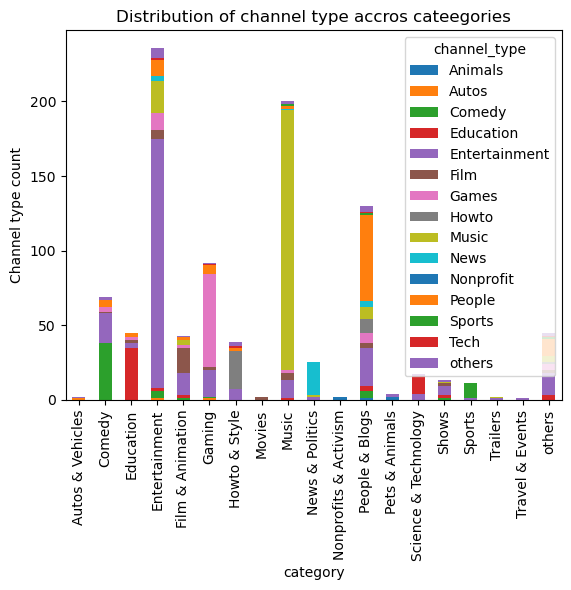

In [103]:
# Bar chart
distribution.plot(kind='bar',stacked=True)
plt.xlabel('category')
plt.ylabel('Channel type count')
plt.title('Distribution of channel type accros cateegories')

In [104]:
# Correlation between the number of subscribers and total video views for YouTube channels

correlation = df['subscribers'].corr(df['video views'])
correlation

0.8250820644440763

In [107]:
#7. Monthly earnings variation throughout different categories
# Descriptive statistics for monthly earnings grouped by category
monthly_earnings_by_category = df.groupby('category')['highest_monthly_earnings'].describe()
monthly_earnings_by_category

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Autos & Vehicles,2.0,1.086350e+06,4.435681e+05,772700.0,929525.00,1086350.0,1243175.0,1400000.0
Comedy,69.0,6.683122e+05,1.094732e+06,0.0,44000.00,132100.0,772700.0,5000000.0
Education,45.0,6.951778e+05,1.283739e+06,0.0,95600.00,334800.0,671600.0,7900000.0
Entertainment,236.0,6.345257e+05,1.181410e+06,0.0,21125.00,185300.0,679600.0,8100000.0
Film & Animation,43.0,7.749670e+05,1.632054e+06,0.0,67750.00,250800.0,618200.0,9200000.0
Gaming,92.0,2.742229e+05,5.139344e+05,0.0,31100.00,156550.0,316200.0,4300000.0
Howto & Style,39.0,1.925452e+05,3.466197e+05,0.0,29600.00,89400.0,174000.0,2000000.0
Movies,2.0,4.547000e+05,6.430429e+05,0.0,227350.00,454700.0,682050.0,909400.0
Music,200.0,5.578226e+05,9.061619e+05,0.0,149525.00,354800.0,673500.0,9000000.0


In [108]:

filtered_year = df.dropna(subset=['created_year'])

# Calculating average subscribers per month
monthly_average = filtered_year['subscribers'] / ((2024 - filtered_year['created_year']) * 12)

# Filling null values with average subscribers per month
filtered_year.loc[filtered_year['last_month_subs'] .isna(), 'last_month_subs'] = monthly_average
    
filtered_year.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,last_month_subs,created_year,created_month,created_date,gte enroll_%,Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082,india,IN,Music,...,2.000000e+06,2006,Mar,13,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8.000000e+06,2012,Feb,20,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1.000000e+06,2006,Sep,1,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000.0,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1.000000e+06,2006,Sep,20,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000.0,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,1.037037e+06,2015,May,12,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


<Axes: >

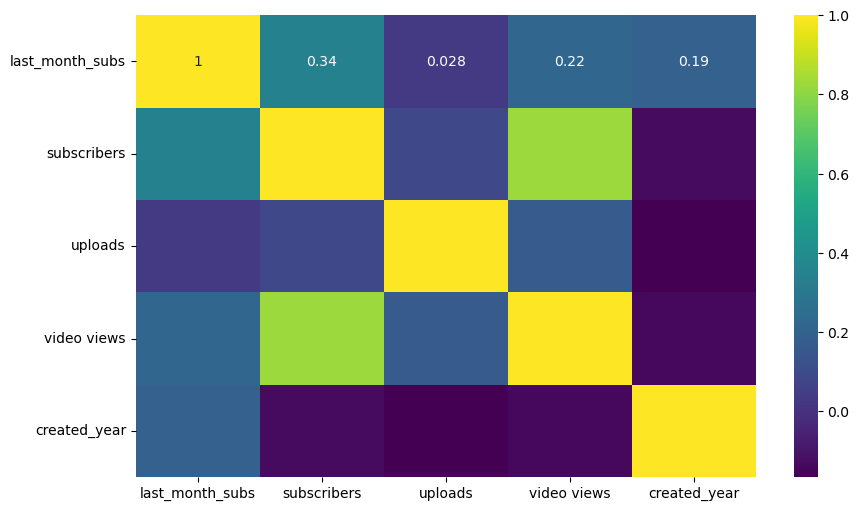

In [117]:
# correlation matrix between last month subscriber gain, total number of subscribers and year of creation

corr_matrix = filtered_year[['last_month_subs', 'subscribers','uploads', 'video views','created_year']].corr()
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')

In [118]:
#8. Overall trend in subscribers gained in the last 30 days across all channels

last_month_subs_by_category = filtered_year.groupby('category')['last_month_subs'].describe()
last_month_subs_by_category = last_month_subs_by_category.sort_values(by='75%',ascending = False)
last_month_subs_by_category

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Shows,13.0,500000.153846,4.242639e+05,2.000000,100000.000000,300000.000000,1000000.000000,1.100000e+06
Autos & Vehicles,2.0,400000.000000,1.414214e+05,300000.000000,350000.000000,400000.000000,450000.000000,5.000000e+05
Movies,2.0,400000.000000,1.414214e+05,300000.000000,350000.000000,400000.000000,450000.000000,5.000000e+05
others,45.0,514934.210700,8.244091e+05,8.000000,100000.000000,200000.000000,402314.814815,3.400000e+06
Comedy,69.0,335378.824891,3.939504e+05,5.000000,100000.000000,135185.185185,400000.000000,1.900000e+06
People & Blogs,130.0,328523.033728,3.936386e+05,1.000000,100000.000000,185714.285714,400000.000000,1.900000e+06
Sports,11.0,252834.008097,2.476362e+05,90384.615385,100000.000000,100000.000000,400000.000000,7.000000e+05
Film & Animation,43.0,461932.855628,1.103551e+06,1.000000,100000.000000,200000.000000,366666.666667,6.700000e+06
Pets & Animals,4.0,325001.250000,5.188117e+05,5.000000,75001.250000,100000.000000,350000.000000,1.100000e+06


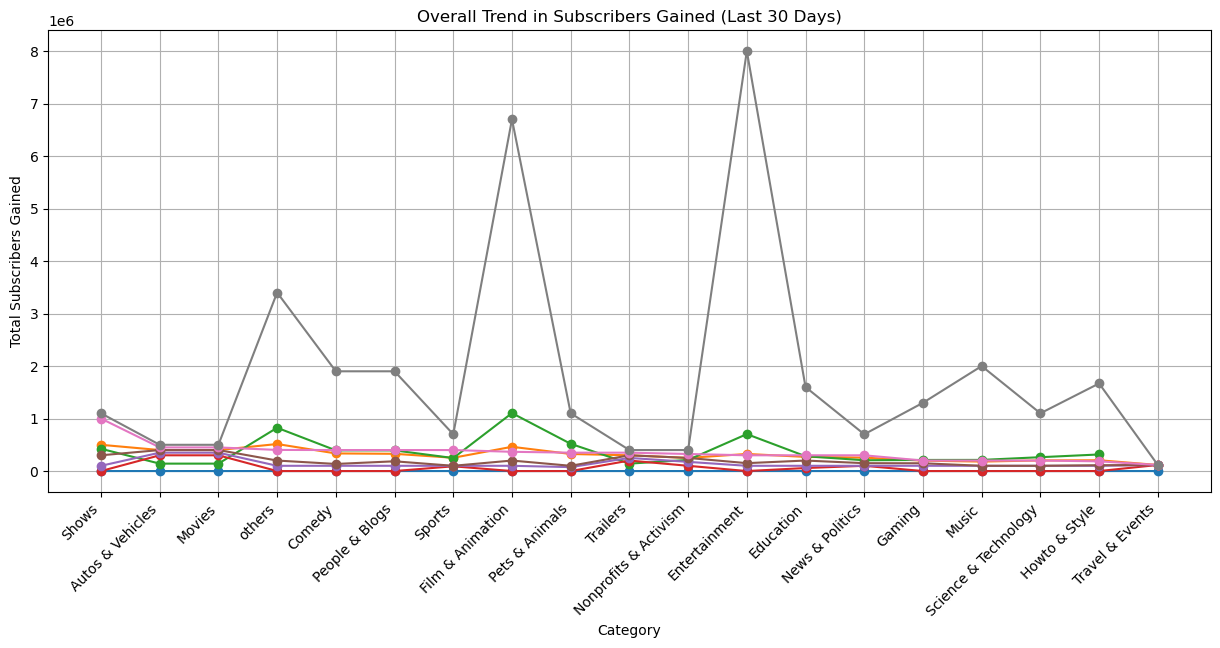

In [123]:
plt.figure(figsize=(15, 6))
plt.plot(last_month_subs_by_category.index, last_month_subs_by_category.values, marker='o', linestyle='-')
plt.xlabel('Category')
plt.ylabel('Total Subscribers Gained')
plt.title('Overall Trend in Subscribers Gained (Last 30 Days)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Box plot for lowest_yearly_earnings Column')

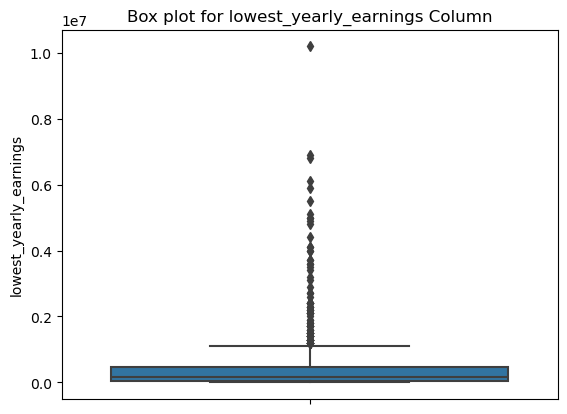

In [124]:
#9. Outliers in terms of yearly earnings from YouTube channels
# Boxplot to visualize outliers in yearly earnings - lowest

sns.boxplot(y='lowest_yearly_earnings',data = df)
plt.title('Box plot for lowest_yearly_earnings Column')

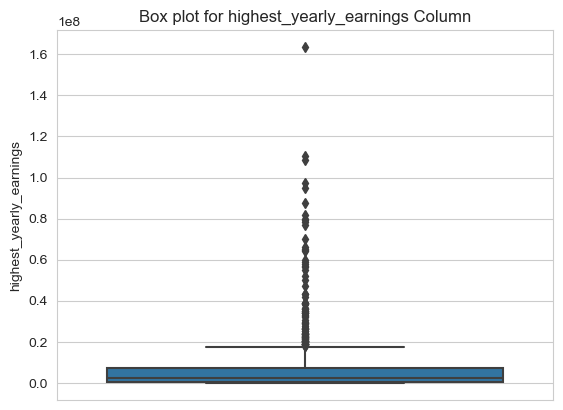

In [126]:
# Boxplot to visualize outliers in yearaly earnings - highest

sns.boxplot(y='highest_yearly_earnings',data = df)
plt.title('Box plot for highest_yearly_earnings Column')
plt.show()

In [128]:
avg_yearly_earnings = (df['lowest_yearly_earnings']+df['highest_yearly_earnings'])/2
avg_yearly_earnings.head()

0    57600000.0
2    34350000.0
3    50350000.0
4    46500000.0
6    18650000.0
dtype: float64

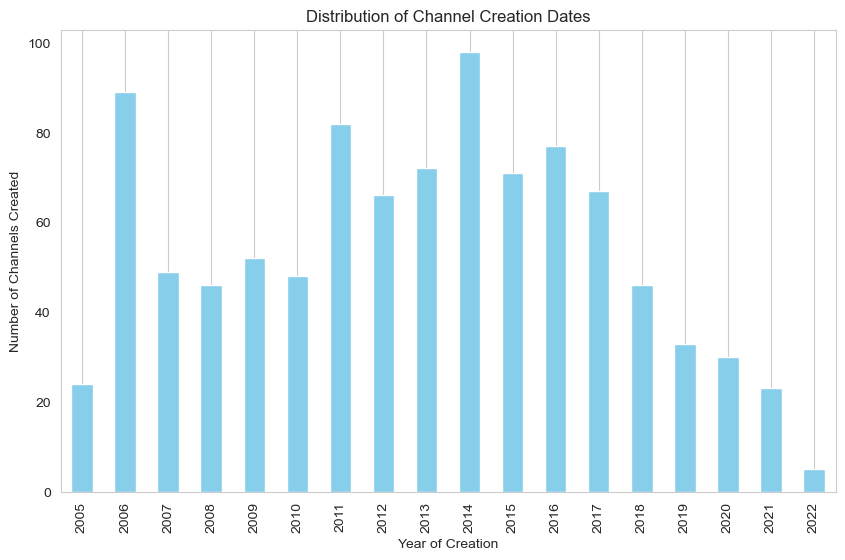

In [129]:
# Distribution of channel creation dates
channel_counts_per_year = filtered_year['created_year'].value_counts()

channel_counts_per_year = channel_counts_per_year.sort_index(ascending=True)

plt.figure(figsize=(10, 6))
channel_counts_per_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year of Creation')
plt.ylabel('Number of Channels Created')
plt.title('Distribution of Channel Creation Dates')
plt.grid(axis='y')
plt.show()

In [131]:
# Creating new dataframe with null values excluded in population

filtered_data = df.dropna(subset=['Population'])
filtered_data.isnull().sum()

rank                          0
Youtuber                      0
subscribers                   0
video views                   0
category                      0
Title                         0
uploads                       0
Country                       0
Abbreviation                  0
channel_type                  0
video_views_rank              0
country_rank                  0
channel_type_rank             7
last_month_views             19
lowest_monthly_earnings       0
highest_monthly_earnings      0
lowest_yearly_earnings        0
highest_yearly_earnings       0
last_month_subs             269
created_year                  0
created_month                 6
created_date                  0
gte enroll_%                  0
Population                    0
Unemployment rate             0
Urban_population              0
Latitude                      0
Longitude                     0
dtype: int64

In [132]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,last_month_subs,created_year,created_month,created_date,gte enroll_%,Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082,india,IN,Music,...,2000000.0,2006,Mar,13,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012,Feb,20,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006,Sep,1,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000.0,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006,Sep,20,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000.0,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015,May,12,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [133]:
# Filling null values in Monthly Subscriber with the corresponding monthly average

monthly_average_subs = filtered_data['subscribers'] / ((2024 - filtered_data['created_year']) * 12)
filtered_data.loc[filtered_data['last_month_subs'] .isna(), 'last_month_subs'] = monthly_average

monthly_average_views = filtered_data['video views'] / ((2024 - filtered_data['created_year']) * 12)
filtered_data.loc[filtered_data['last_month_views'] .isna(), 'last_month_views'] = monthly_average_views

filtered_data.head(15)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,last_month_subs,created_year,created_month,created_date,gte enroll_%,Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082,india,IN,Music,...,2.000000e+06,2006,Mar,13,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000.0,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8.000000e+06,2012,Feb,20,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000.0,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1.000000e+06,2006,Sep,1,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000.0,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1.000000e+06,2006,Sep,20,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000.0,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,1.037037e+06,2015,May,12,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000.0,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,6.607143e+05,2010,Apr,29,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000.0,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,1.000000e+05,2016,Jan,14,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000.0,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,6.000000e+05,2018,Apr,23,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
10,11,Zee Music Company,96700000.0,5.785629e+10,Music,Zee Music Company,8548,India,IN,Music,...,1.100000e+06,2014,Mar,12,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
11,12,WWE,96000000.0,7.742847e+10,Sports,WWE,70127,United States,US,Sports,...,6.000000e+05,2007,May,11,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [135]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'last_month_views', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'last_month_subs', 'created_year',
       'created_month', 'created_date', 'gte enroll_%', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [137]:
# New DataFrame with 'gte_enrol_percent', 'Population','Unemployment_rate','Urban_population','Latitude','Longitude' by country

fd = filtered_data.groupby('Country')[['subscribers','last_month_subs','gte enroll_%', 'Population','Unemployment rate','Urban_population','Latitude','Longitude']].mean().reset_index()

In [138]:
# Adding channel count to newly created dataframe

channel_counts = filtered_data['Country'].value_counts().reset_index(name='channel_count')
print(channel_counts)
fd = fd.merge(channel_counts, on='Country', how='right')
fd.head()

                 Country  channel_count
0          United States            309
1                  India            166
2                 Brazil             61
3         United Kingdom             43
4                 Mexico             33
5              Indonesia             28
6                  Spain             21
7               Thailand             18
8            South Korea             17
9                 Russia             16
10                Canada             14
11             Argentina             13
12           Philippines             12
13              Colombia             11
14          Saudi Arabia              9
15               Ukraine              8
16             Australia              8
17  United Arab Emirates              7
18               Germany              6
19              Pakistan              6
20                France              5
21                 Japan              5
22                Sweden              4
23                Turkey              4


,Country,subscribers,last_month_subs,gte enroll_%,Population,Unemployment rate,Urban_population,Latitude,Longitude,channel_count
0,United States,2.276311e+07,270155.543484,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,309
1,India,2.441687e+07,354882.799261,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,166
2,Brazil,1.979180e+07,183630.617447,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280,61
3,United Kingdom,2.133488e+07,193868.615547,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973,43
4,Mexico,1.899697e+07,165698.098198,40.2,1.260140e+08,3.42,102626859.0,23.634501,-102.552784,33


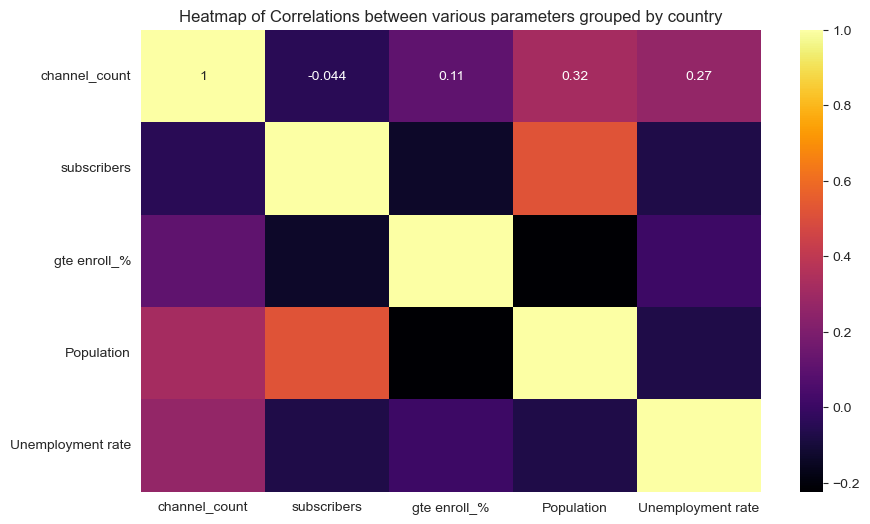

In [140]:
# correlation matrix between last month subscriber gain, total number of subscribers and year of creation
corr_mat = fd[['channel_count', 'subscribers','gte enroll_%', 'Population','Unemployment rate']].corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_mat, annot=True, cmap='inferno')
plt.title('Heatmap of Correlations between various parameters grouped by country')
plt.show()

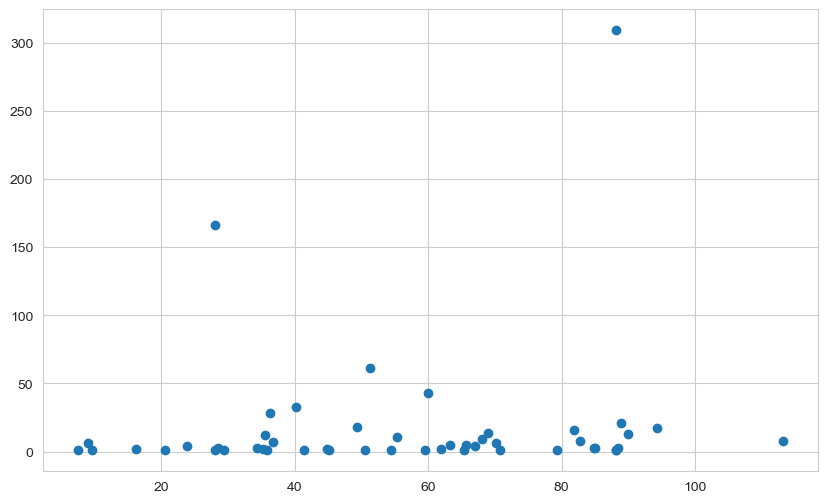

In [142]:
plt.figure(figsize=(10, 6))
plt.scatter(fd['gte enroll_%'], fd['channel_count'])
plt.grid(True)

In [145]:
# Unemployment rate variation among the top 10 countries with the highest number of YouTube channels
fd_top10 = fd.head(10)
corr_channel_unemp = fd_top10['channel_count'].corr(fd_top10['Unemployment rate'])
corr_channel_unemp

0.5295201355557377

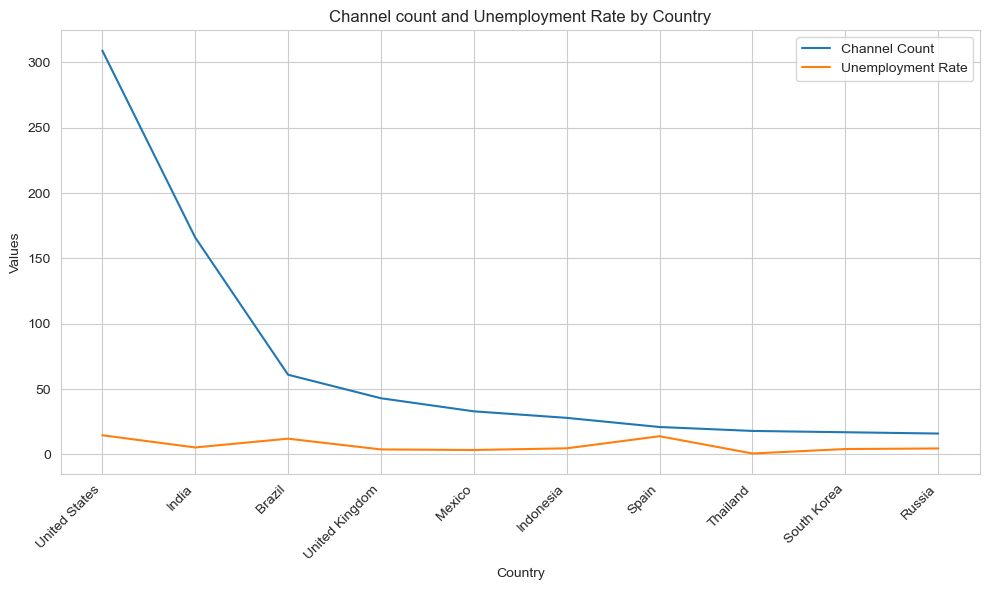

In [147]:
plt.figure(figsize=(10, 6))
plt.plot(fd_top10['Country'], fd_top10['channel_count'],label = 'Channel Count')
plt.plot(fd_top10['Country'], fd_top10['Unemployment rate'], label = 'Unemployment Rate')
#plt.plot(df[category_col], df[col], label=col)
plt.xlabel('Country')
plt.ylabel('Values')
plt.title('Channel count and Unemployment Rate by Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()


In [148]:
#13. Average urban population percentage in countries with YouTube channels
fd['Urban_population_percent'] = (fd['Urban_population'] / fd['Population']) * 100
fd['Urban_population_percent'].mean()

70.0483033344962

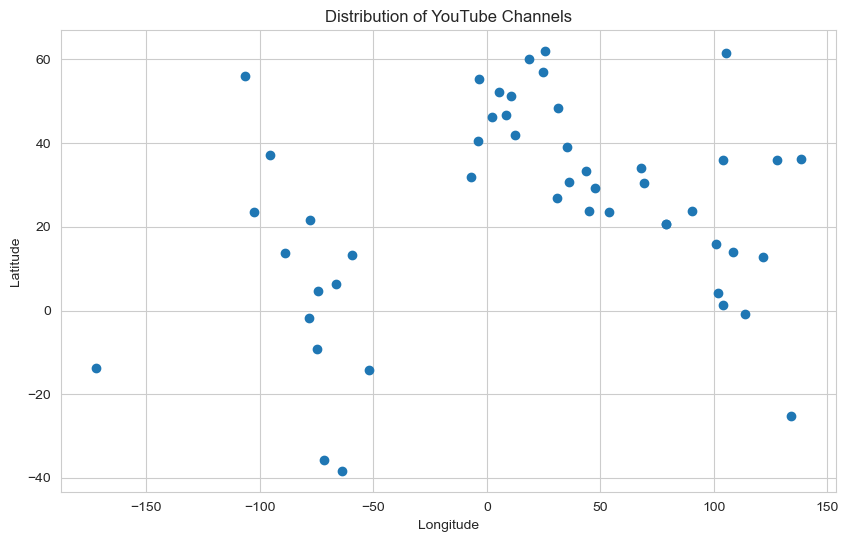

In [149]:
#14. Distribution of YouTube channels based on latitude and longitude coordinates
plt.figure(figsize=(10, 6))
plt.scatter(fd['Longitude'], fd['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of YouTube Channels')
plt.grid(True)

In [150]:
#15. Correlation between the number of subscribers and the population of a country
corr_subs_ppl = fd['subscribers'].corr(fd['Population'])
corr_subs_ppl

0.5209898007551594

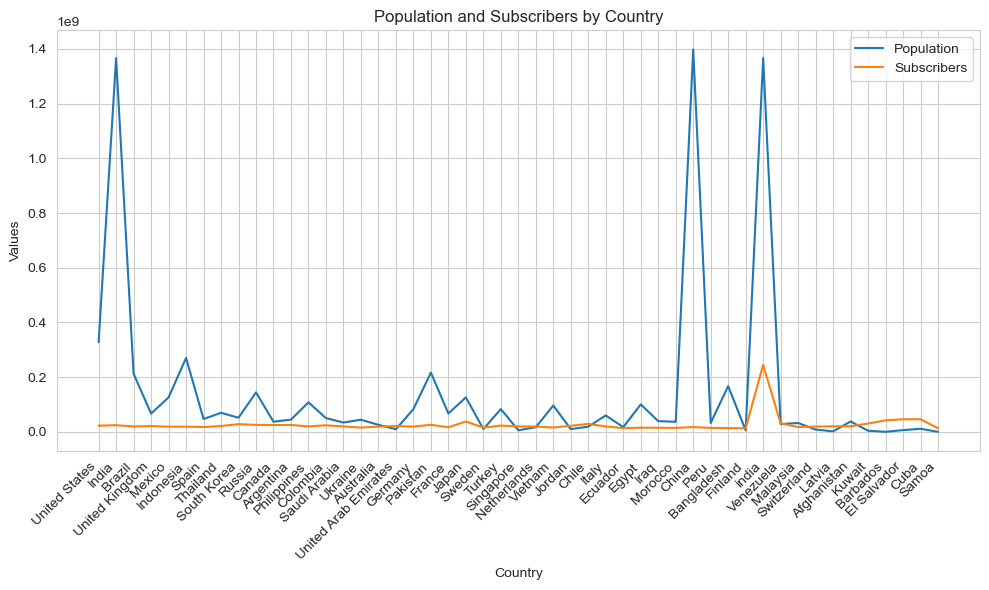

In [151]:
plt.figure(figsize=(10, 6))
plt.plot(fd['Country'], fd['Population'],label = 'Population')
plt.plot(fd['Country'], fd['subscribers'], label = 'Subscribers')
#plt.plot(df[category_col], df[col], label=col)
plt.xlabel('Country')
plt.ylabel('Values')
plt.title('Population and Subscribers by Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of Video Views by Channel Type (Last 30 Days)')

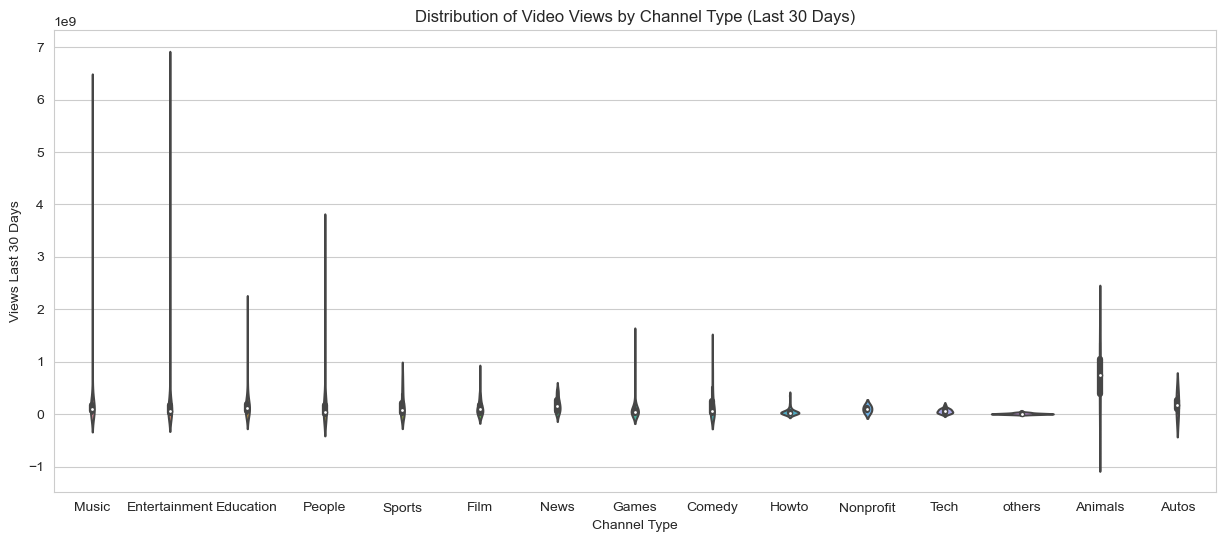

In [153]:
#18. Distribution of video views for the last 30 days vary across different channel types
#Violin Plot
plt.figure(figsize=(15, 6))
sns.violinplot(x='channel_type', y='last_month_views', data=filtered_data)
plt.xlabel('Channel Type')
plt.ylabel('Views Last 30 Days')
plt.title('Distribution of Video Views by Channel Type (Last 30 Days)')